## Observations and Insights 

In [91]:
%matplotlib inline

In [206]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset.  
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID","Mouse ID"])

#Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [207]:
# Checking the number of mice.
mice_cnt = mouse_data_complete['Mouse ID'].nunique()

mice_cnt


249

In [208]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()

duplicate_rows

array(['g989'], dtype=object)

In [209]:
# Optional: Get all teh data for the duplicate mouse ID

duplicate_rows_data = mouse_data_complete.loc[mouse_data_complete['Mouse ID'] == "g989"]

duplicate_rows_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [210]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_data = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_rows)==False]
clean_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [211]:
# Checking the number of mice in the clean DataFrame.

mice_unique_cnt = clean_mouse_data['Mouse ID'].nunique()

mice_unique_cnt


248

## Summary Statistics

In [212]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_data_group = clean_mouse_data.groupby("Drug Regimen")
clean_data_group["Mouse ID"].count()

mean_reg = clean_data_group["Tumor Volume (mm3)"].mean()
mean_reg

median_reg = clean_data_group["Tumor Volume (mm3)"].median()
median_reg

var_reg = clean_data_group["Tumor Volume (mm3)"].var()
var_reg

std_reg = clean_data_group["Tumor Volume (mm3)"].std()
std_reg

sem_reg = clean_data_group["Tumor Volume (mm3)"].sem()
sem_reg

mouse_data_summ_df = pd.DataFrame({"Mean":mean_reg, "Median":median_reg,"Variance":var_reg,"Standard Deviation":std_reg,"SEM":sem_reg})

mouse_data_summ_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [213]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summ = clean_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

agg_summ

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

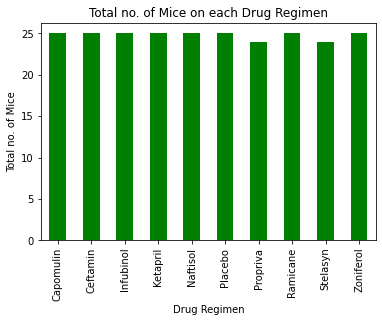

<Figure size 432x288 with 0 Axes>

In [215]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoints = clean_mouse_data.groupby(['Drug Regimen'])['Mouse ID'].nunique()
total_timepoints

# Use DataFrame.plot() in order to create a bar chart of the data
bar_plot = total_timepoints.plot(kind="bar", facecolor="green")

# Set a title for the chart
plt.title("Total no. of Mice on each Drug Regimen")
plt.ylabel("Total no. of Mice")

plt.show()
plt.tight_layout()

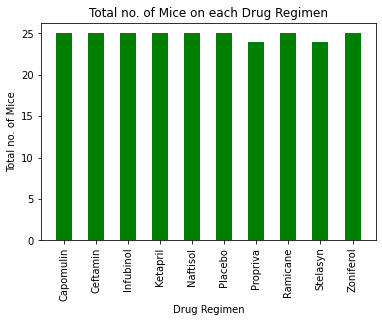

<Figure size 432x288 with 0 Axes>

In [216]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
reg = clean_mouse_data.groupby("Drug Regimen")["Mouse ID"].nunique()

x_axis = np.arange(0,len(reg))
tick_locations= []
for x in x_axis:
     tick_locations.append(x)
# Set a title for the chart
plt.title("Total no. of Mice on each Drug Regimen")
plt.ylabel("Total no. of Mice")
plt.xlabel("Drug Regimen")

#plt.xlim(-0.5,len(total_timeplots)-0.5)
#plt.ylim(0,total_timeplots.max()+2)

plt.bar(reg.index,reg,facecolor="green",align="center",width=0.5)
plt.xticks(tick_locations,reg.index,rotation='vertical')
plt.show()
plt.tight_layout()

Male      125
Female    123
Name: Sex, dtype: int64

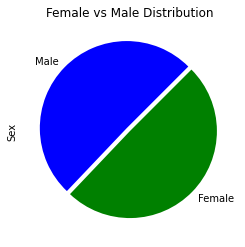

In [220]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_females = clean_mouse_data[["Mouse ID","Sex"]].drop_duplicates()

colors = ["blue","green"]
explode=(0.05,0)

sex_dist = male_females["Sex"].value_counts()
pie_plot = sex_dist.plot(kind="pie", title="Female vs Male Distribution",startangle=45,explode=explode,colors=colors)
sex_dist


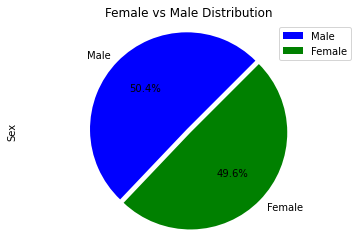

In [221]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_dist,labels=sex_dist.index, autopct="%1.1f%%",colors = colors,startangle=45,explode=explode)
plt.axis("equal")
plt.title("Female vs Male Distribution")
plt.ylabel("Sex")
plt.legend(loc="upper right")
plt.show()

## Quartiles, Outliers and Boxplots

In [222]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = clean_mouse_data.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tum_vol = pd.merge(clean_mouse_data,timepoint,how="inner",on=["Mouse ID","Timepoint"])


In [223]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    # add subset 
    # Determine outliers using upper and lower bounds
for drugs in drug_list:
        col_df = tum_vol.loc[tum_vol["Drug Regimen"]==drugs]["Tumor Volume (mm3)"]
        tumor_vol.append(col_df)
        quartiles = col_df.quantile([0.25,0.5,0.75])
        
        iqr = quartiles[0.75]-quartiles[0.25]
        
        lower_bound = quartiles[0.25]-(1.5*iqr)
        upper_bound=quartiles[0.75] + (1.5*iqr)
        
        outliers = col_df.loc[(col_df>upper_bound) | (col_df < lower_bound)]
        

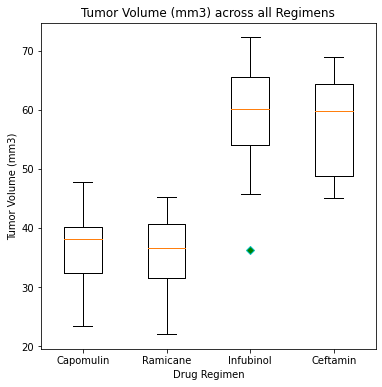

In [224]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

green_dot = dict(markerfacecolor="g",marker="D",markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.boxplot(tumor_vol,flierprops=green_dot)
ax1.set_title('Tumor Volume (mm3) across all Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.xaxis.set(ticks=range(1,len(drug_list)+1),ticklabels=drug_list)

plt.show()

## Line and Scatter Plots

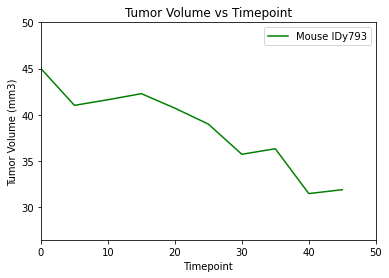

In [225]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data = (clean_mouse_data[clean_mouse_data["Drug Regimen"]=="Capomulin"]).sample()
merge_mouse = pd.merge(clean_mouse_data,mouse_data,on="Mouse ID",how="inner")
mouse_df = merge_mouse.drop([col for col in merge_mouse.columns if '_y' in col],axis=1)

time = mouse_df["Timepoint_x"]
vol = mouse_df["Tumor Volume (mm3)_x"]
label = mouse_df["Mouse ID"].unique()
line, = plt.plot(time,vol,'g-')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint")
plt.xlim(0,time.max()+5)
plt.ylim(vol.min()-5,vol.max()+5)
plt.legend("Mouse ID"+label)
plt.show()

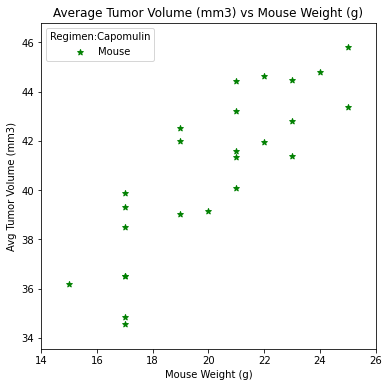

In [226]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_data = (clean_mouse_data[clean_mouse_data["Drug Regimen"]=="Capomulin"])
tumvol = mouse_data.groupby(['Mouse ID'])["Tumor Volume (mm3)"].mean()
mouse_wt = mouse_data.groupby(['Mouse ID'])["Weight (g)"].mean()
mouse_vol_wt = pd.merge(tumvol,mouse_wt,on="Mouse ID", how="inner")
vol = mouse_vol_wt.iloc[:,0]
wt = mouse_vol_wt.iloc[:,1]

fig,ax = plt.subplots(figsize=(6,6))
ax.set_autoscale_on(True)
ax.scatter(wt,vol,marker="*",facecolors="green",edgecolors="green")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Average Tumor Volume (mm3) vs Mouse Weight (g)")
plt.xlim(wt.min()-1,wt.max()+1)
plt.ylim(vol.min()-1,vol.max()+1)
plt.legend(["Mouse"],loc="upper left",title="Regimen:Capomulin")
plt.show()

## Correlation and Regression

In [227]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coef = round(st.pearsonr(wt,vol)[0],2)
print(f" The average corelation coefficient between Average Tumor (mm3) and Mouse Weight (g) is :{corr_coef}")

 The average corelation coefficient between Average Tumor (mm3) and Mouse Weight (g) is :0.84


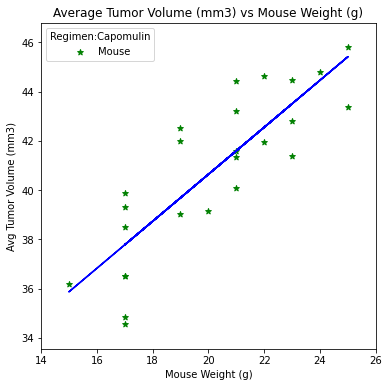

In [228]:
# Linear Regression Model

slope,intercept,rvalue,pvalue,std_err = st.linregress(wt,vol)

#equation of line
line = slope * wt + intercept
eq_line = f"y= {round(slope,2)}x + {round(intercept,2)}"

#plot linear model on scatter plot

fig,ax = plt.subplots(figsize=(6,6))
ax.set_autoscale_on(True)
ax.scatter(wt,vol,marker="*",facecolors="green",edgecolors="green")
plt.legend(["Mouse"],loc="upper left",title="Regimen:Capomulin")
plt.plot(wt,line,'b-')
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Average Tumor Volume (mm3) vs Mouse Weight (g)")
plt.xlim(wt.min()-1,wt.max()+1)
plt.ylim(vol.min()-1,vol.max()+1)

plt.show()